In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, "savefig.dpi":300})
sns.set_context("notebook")
sns.set_style("ticks")

import scipy
import scipy.stats as st
import urllib.request
import os

def download(
    url : str,
    local_filename : str = None
):
    """Download a file from a url.
    
    Arguments
    url            -- The url we want to download.
    local_filename -- The filemame to write on. If not
                      specified 
    """
    if local_filename is None:
        local_filename = os.path.basename(url)
    urllib.request.urlretrieve(url, local_filename)

(logistic_regression_with_many_features)=
# Logistic Regression with Many Features

Let's repeat what we did for the HMX example.
Instead of using a linear model inside the sigmoid, we will use a quadratic model.
That is, the probability of an explosion will be:

$$
p(y=1|x,\mathbf{w}) = \operatorname{sigm}\left(w_0 + w_1 x + w_2 x^2\right).
$$

Let's load the data firs:

In [2]:
url = "https://github.com/PredictiveScienceLab/data-analytics-se/raw/master/lecturebook/data/hmx_data.csv"
download(url)

import pandas as pd

data = pd.read_csv('hmx_data.csv')
x = data['Height'].values
label_coding = {'E': 1, 'N': 0}
y = np.array([label_coding[r] for r in data['Result']])
data['y'] = y
data.head()

,Height,Result,y
0,40.5,E,1
1,40.5,E,1
2,40.5,E,1
3,40.5,E,1
4,40.5,E,1


Now let's train a second degree polynomial model:

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Design matrix
poly = PolynomialFeatures(2)
Phi = poly.fit_transform(x[:, None])

# Fit
model = LogisticRegression(
    penalty='none',
    fit_intercept=False
).fit(Phi, y)

Here are the model parameters:

In [4]:
model.coef_

array([[-0.028, -0.417,  0.013]])

Let's plot the predictions:

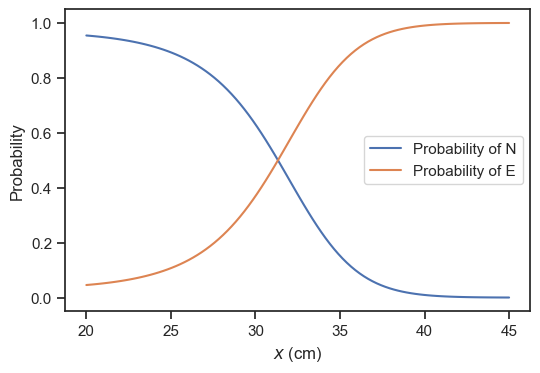

In [5]:
fig, ax = plt.subplots()
xx = np.linspace(20.0, 45.0, 100)
Phi_xx = poly.fit_transform(xx[:, None])
predictions_xx = model.predict_proba(Phi_xx)
ax.plot(
    xx,
    predictions_xx[:, 0],
    label='Probability of N'
)
ax.plot(
    xx,
    predictions_xx[:, 1],
    label='Probability of E'
)
ax.set_xlabel('$x$ (cm)')
ax.set_ylabel('Probability')
plt.legend(loc='best');

## Questions

+ Do you think that it is worth going to a second degree model? Can you think of a way to compare the two models?
+ Rerun the code above with polynomial degree 3, 4, and 5. What do you observe? Do you trust the results? Why or why not?